## Portfolio Optimization: XOM (Exxon) and Tesla(TSLA) stock for the period (Jan 2018 - Dec 2022)

The process of building the optimum portfolio for specific underlying assets under specific conditions is known as portfolio optimization. This study will therefore provide direction for our portfolio optimization utilizing Python's Efficient Frontier.

### 1. Importing Tesla and Exxon data

First, we import the relevant tickers for our portfolio. In this case, we have chosen Exxon and Tesla as our companies. This model will, therefore, attempt to optimize this portfolio by using minimum variance to determine the weight of each share on our portfolio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import datetime as dt

In [2]:
companies = ["exxon", "tesla"]
portfolio = pd.DataFrame()

for i in range(2):
    company = pd.read_csv(
        r"C:/Users/Brian Ngetich/OneDrive/my_freelance/academic_writing/tao_liu/others/min_var_calc/" + str(companies[i]) + ".csv",
        delimiter = ",",
        decimal = ".",
        names = ["Date", 'Close'],
        header = 0,
        index_col='Date',
        usecols=['Date','Close'],
        parse_dates = True)

    portfolio = pd.merge(portfolio, company, left_index = True, right_index=True, how = "outer")

portfolio.rename(columns={'Date': 'Date', 'Close_x':'Exxon', 'Close_y':'Tesla'}, inplace=True)
portfolio

,Exxon,Tesla
Date,,
2018-01-01,83.820000,20.799999
2018-02-01,87.500000,23.400000
2018-03-01,75.529999,23.000668
2018-04-01,74.269997,17.084000
2018-05-01,77.260002,19.567333
2018-06-01,81.870003,19.057333
2018-07-01,81.889999,24.004667
2018-08-01,80.889999,19.865999
2018-09-01,80.410004,19.796000


### 2. Calculating for the Portfolio Return

We start by calculating the cumulative return of our stocks over the past 5 years. This will give us a better perspective on the shape of the volatility of stock returns over the months leading to Dec 1st.

In [3]:
portfolio_returns = portfolio.pct_change()

portfolio_cum_returns = portfolio_returns.add(1).cumprod().sub(1)*100

fig = px.line(
  portfolio_cum_returns,
  x=portfolio_cum_returns.index,
  y=portfolio_cum_returns.columns,
  title='Cumulative Stock Returns (2018-2020)'
  )
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()

Of the two stocks, it is clear that Tesla has been the best performing stock of the last five years with a cumulative stock return of +847.5% as of Dec 1st 2022. Exxon, on the other hand, had a cumulative stock return of +33.19017%.

Next, we calculate for the portfolio return. To start with, we award each stock 50% weight since there are only two stocks in our portfolio. These are values that we will later optimize.

In [4]:
weight_portfolio = [0.5, 0.5]
portfolio_return = portfolio_returns.dot(weight_portfolio)
portfolio_return.head()

Date
2018-01-01         NaN
2018-02-01    0.084452
2018-03-01   -0.076933
2018-04-01   -0.136961
2018-05-01    0.092809
dtype: float64

### 3. Calculating for the Portfolio Risk

Following a description of the procedure for calculating a portfolio's risk, we provide the mathematical formulation for each stage.

- Do the returns data's covariance matrix calculation.
- Add 252 to the covariance to annualize it.
- Multiply the portfolio variance using the weight vectors to calculate it.
- To determine the standard deviation, square the variance determined before. This standard deviation is referred to as the portfolio's volatility.

We double the covariance by 252 in order to annualize it because there are 252 trading days.

#### i. Covariance Matrix

In [5]:
variance_matrix = portfolio_returns.cov()*252
variance_matrix

,Exxon,Tesla
Exxon,2.731515,0.973827
Tesla,0.973827,11.856912


The off-diagonal terms in the variance matrix indicate the covariance between the two stocks: Exxon and Tesla. The diagonal terms in the variance matrix represent the variance of each asset.

The following is the Python code to calculate the portfolio risk using the technique we saw above:

In [6]:
corr_matrix = portfolio_returns.corr()
corr_matrix

,Exxon,Tesla
Exxon,1.000000,0.171117
Tesla,0.171117,1.000000


#### ii. Portfolio Variance & Standard Deviation

In [7]:
# Compute portfolio variance
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio

# Computing portfolio volatility (Risk)
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio variance is", portfolio_variance)
print("Portfolio Volatility (Risk) is ", portfolio_volatility)

Portfolio variance is 4.1340202768617145
Portfolio Volatility (Risk) is  2.033229027154028


Our next objective is to optimize the weights.

### 3. Portfolio Optimization

According to modern portfolio theory (MPT), it is important to consider how an investment will impact the risk and return of the entire portfolio rather than just its own risk and return characteristics. MPT demonstrates how an investor may put together a portfolio of several assets to optimize returns for a particular degree of risk. Similar to this, an investor can create a portfolio with the lowest risk feasible given a certain amount of projected return. According to statistical measurements like variance and correlation, the performance of a single stock is less significant than how it affects the overall portfolio. Our objective, therefore, is to maximize the expected return given a degree of risk by selecting the weights for each item in our portfolio.

#### a) Efficient Frontier

The collection of ideal portfolios known as the efficient frontier provides either the lowest risk or the best projected return for a specified level of risk. Basically, if the expected return is at least higher than a certain figure, we can reduce the risk. The goal is to reduce portfolio variance, which reduces portfolio volatility and, in turn, reduces risk. This is subject to restrictions, such as the need that the returns exceed a certain target return, that all weights amount to 1, and the prohibition on negative weights.

##### i. Create the efficient frontier

In [8]:
# Initialize an empty list for storing the portfolio returns
port_returns = []
# Initialize an empty list for storing the portfolio volatility
port_volatility = []
# Initialize an empty list for storing the portfolio weights
port_weights = []

num_assets = len(portfolio.columns)
num_portfolios = 10000

# Computing the individual asset return
individual_returns = portfolio.resample('Y').last().pct_change().mean()

##### ii. Generate weights for our stocks and normalized the weight to sum to 1

In [9]:
for port in range(num_portfolios):
  # Randomly generate weigh combination
  weights = np.random.random(num_assets)
  # Normalize weight so that they sum to 1
  weights = weights/np.sum(weights)
  port_weights.append(weights)
  # Returns are the dot product of individual expected returns of stock and its weights.
  returns = np.dot(weights, individual_returns)
  port_returns.append(returns)

  # Computing portfolio variance
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  # Daily standard deviation: volatility is square root of variance
  sd = np.sqrt(var)
  # Annualizing the standard deviation will give us the volatility
  ann_sd = sd*np.sqrt(250)
  port_volatility.append(ann_sd)

# Create a dictionary of returns and volatility
data = {'Returns': port_returns, 'Volatility': port_volatility}

for counter, symbol in enumerate(portfolio.columns.tolist()):
  data[symbol + ' weight'] = [w[counter] for w in port_weights]

Here is the preview of the data of portfolio returns, volatility and weights.

In [10]:
# Converting the dictionary to dataframe
portfolios_V1 = pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,Exxon weight,Tesla weight
0,1.284299,34.641517,0.433187,0.566813
1,0.607304,25.264808,0.788621,0.211379
2,1.861647,48.061513,0.130071,0.869929
3,1.167174,32.337763,0.494680,0.505320
4,1.629712,42.358692,0.251840,0.748160


Now that we have everything we need, we can go on to the last step and select the ideal set of weights. We determine the efficient frontier by plotting volatility against the returns that we calculated above.

Text(0, 0.5, 'Expected Returns')

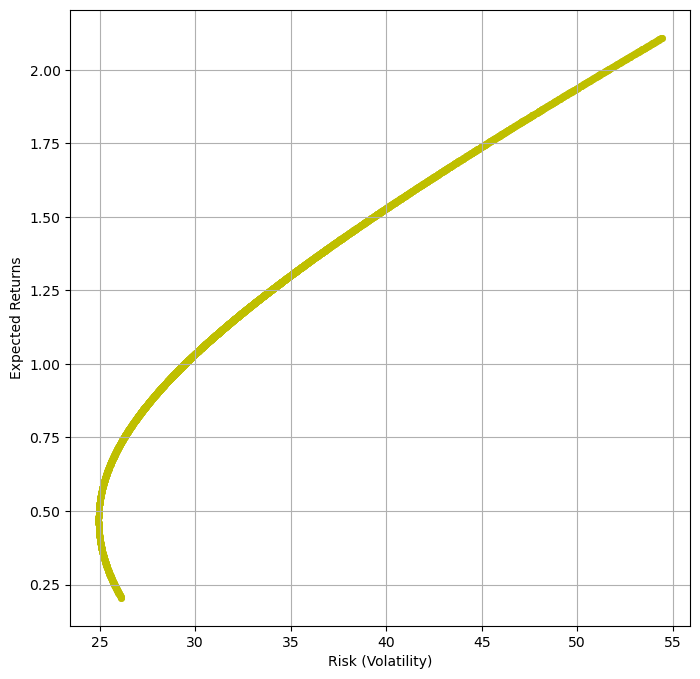

In [11]:
# Plot efficient frontier
portfolios_V1.plot.scatter(
  x='Volatility',
  y='Returns',
  marker='o',
  color='y',
  s=15,
  alpha=0.5,
  grid=True,
  figsize=[8,8])
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Returns')

#### b) Minimum Variance Portfolio (Exponentially Weighted)

As the name already implies, the Minimum Variance Portfolio (MVP) is a specific financial portfolio of specified assets with the lowest risk possible while still being regarded as optimal with its assets. The parabola of the Efficient Frontier's MVP is situated at its vertex. Due to its already respectable returns and minimal levels of risk, this specific portfolio is quite well liked by risk-averse investors.

We use the.idxmin() method to locate the row in our dataframe that corresponds to the smallest variance in order to discover the minimum volatility combination. Below is the code to accomplish the same thing:

In [12]:
# Min Volatility
# idxmin() gives us the minimum value in the column that had been specified
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

Returns          0.469422
Volatility      24.935467
Exxon weight     0.861011
Tesla weight     0.138989
Name: 8844, dtype: float64

Text(0, 0.5, 'Expected Returns')

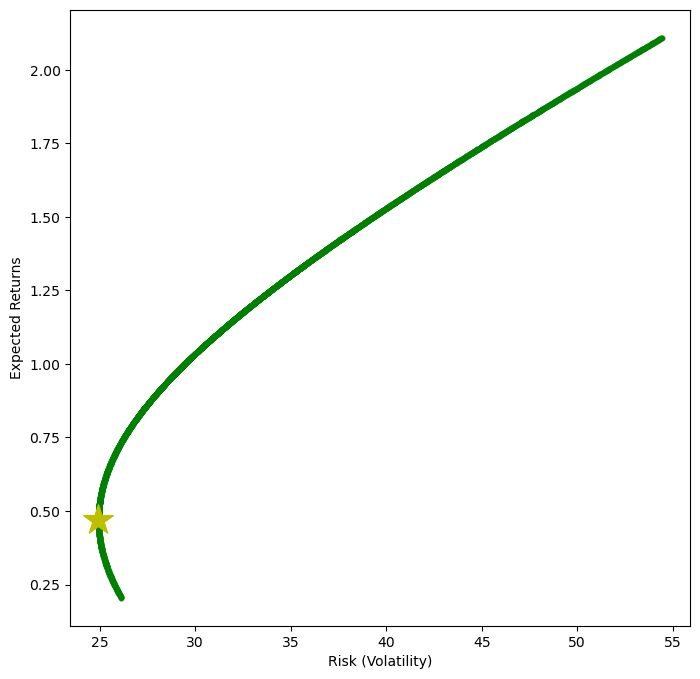

In [13]:
# Plotting optimal portfolio and minimum volatility
plt.subplots(figsize = (8,8))
plt.scatter(portfolios_V1['Volatility'], portfolios_V1['Returns'], marker='o',s=10,
alpha=0.3, color='green')
plt.scatter(min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Returns')

The minimal volatility point corresponds to the yellow star.